## Loading data into Pandas

In [2]:
## Summary of functions:

## Reading a csv
#  df = pd.read_csv('pokemon_data.csv')
## Saving a csv
#  df.to_csv('modified.txt', index=False, sep=',')

## Quick summary of each column
#  df.describe()
#  df.shape()  ## row and column count
#  df.dtypes

## Getting rows in a dataframe:
#  df_one_to_four = df.iloc[0:4]

## Define new dataframe by choosing columns:
#  df_nametypehp = df[['Name', 'Type 1', 'HP']]

## Sorting ascending, descending, multiple columns
#  df_sort1 = df.sort_values(['Type 1', 'HP'], ascending=[1,0]) 

## Conditional sort
#  df_type1_grass = df.loc[df['Type 1'] == "Grass"]
#  new_df = df.loc[(df['Type 1'] == 'Grass') & (df['HP'] > 70)]  ## Multiple conditions require parens
## Exclude matches:
# df.loc[~df['Name'].str.contains('Mega')]  ## .contains requires a string type object
## regular expressions
# df.loc[df['Type 1'].str.contains('Fire|Grass', regex=True, flags=re.I)]  ## Flags ignore case, etc.
# df.loc[df['Name'].str.contains('^pi[a-z]*', regex=True, flags=re.I)]  ## Flags ignore case, etc.


## Remove columnn
#  df = df.drop(columns=['Total'])

## Sum columns in a row... Axis=1 is row sum, Axis=0 is column sum
#  df['Total'] = df.iloc[:, 4:10].sum(axis=1)

## Dropping indicies:
#  new_df.reset_index(drop=True)

## Conditional changes: if(total > 500), change 
#  df.loc[df['Type 1'] == 'Fire', 'Type 1'] = 'Flameyboi'  ## Change Fire to flameyboi in df
#  df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Gen Test', 'Legend Test']  ## Specify generation and legendary entries if initial condition is met

## Groupby:
#  df.groupby(['Type 1']).mean().sort_values('Defense', ascending=False) 
  ## Group by Type 1, take the mean of those groups, sort the output by highest to lowest defense.
#  df.groupby(['Type 1']).sum()
#  df.groupby(['Type 1', 'Type 2']).count()

## percent change
#  df.pct_change


## Correlation plots:
#  import numpy as np
#  corr = df.corr()
#  corr.style.background_gradient(cmap='RdPu')  ## cool, Blues, coolwarm, plasma, copper

#  import seaborn as sns
#  sns.pairplot(df)





In [39]:
import pandas as pd
#import re   ## Import Perl regular expression matching.

## Read a csv file
df = pd.read_csv('pokemon_data.csv')
print(df.head(5))
print(df.dtypes)

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  
#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [66]:
import numpy as np
corr = df.corr()
#corr.style.background_gradient(cmap='cool')
corr.style.background_gradient(cmap='RdPu')  ## cool, Blues, coolwarm, plasma, copper

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
HP,0.097614,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


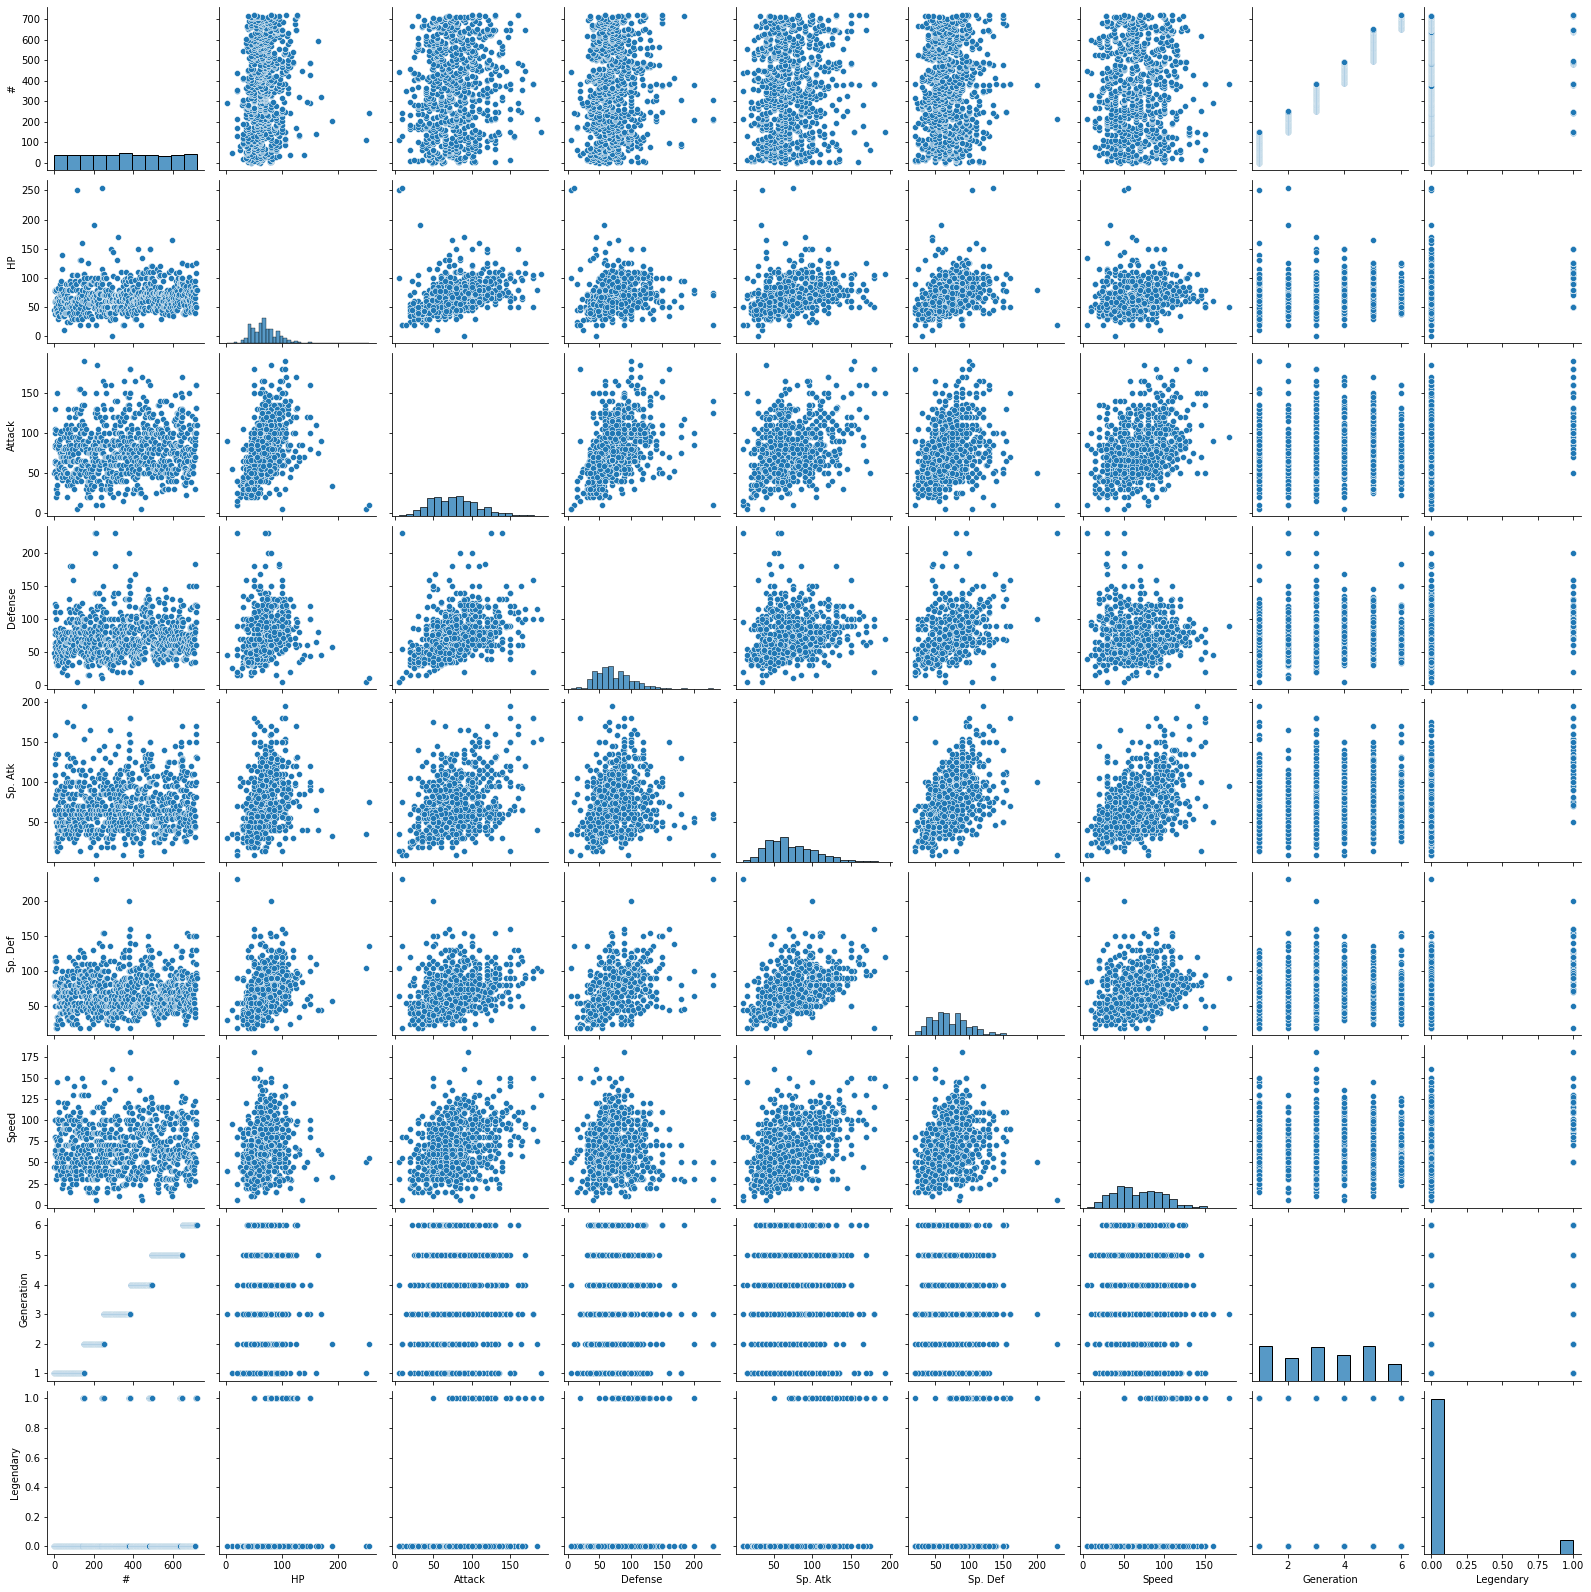

In [67]:
import seaborn as sns
sns.pairplot(df)

In [4]:
## Read an excel file
# df_xlsx = pd.read_excel('pokemon_data.xlsx')
# print(df_xlsx.head(3))

In [5]:
## Read a tab delimited text file
# df = pd.read_csv('pokemon_data.txt', delimiter='\t')
# print(df.head(5))

In [6]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
## Define a new vector from one column
df_hp = df['HP']
print(df_hp)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


## Reading Data in Pandas

In [8]:
#### Read Headers
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [9]:
## Read each Column
df_nametypehp = df[['Name', 'Type 1', 'HP']]
print(df_nametypehp)

                      Name   Type 1  HP
0                Bulbasaur    Grass  45
1                  Ivysaur    Grass  60
2                 Venusaur    Grass  80
3    VenusaurMega Venusaur    Grass  80
4               Charmander     Fire  39
..                     ...      ...  ..
795                Diancie     Rock  50
796    DiancieMega Diancie     Rock  50
797    HoopaHoopa Confined  Psychic  80
798     HoopaHoopa Unbound  Psychic  80
799              Volcanion     Fire  80

[800 rows x 3 columns]


In [10]:
##  *.iloc:  Read Each Row
df_one_to_four = df.iloc[0:4] ## Getting rows in a dataframe
df_one_to_four

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [11]:
print("\n\nThe element in the second row(1), and fourth column(3)")
df.iloc[1,4]



The element in the second row(1), and fourth column(3)


60

In [12]:
## Printing complete dataframes / rows
for index, row in df.iterrows():
    #print(index, row)             ## Print each as a separate list
    print(index, row['Name'])      ## Print each index next to its name


0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise
12 BlastoiseMega Blastoise
13 Caterpie
14 Metapod
15 Butterfree
16 Weedle
17 Kakuna
18 Beedrill
19 BeedrillMega Beedrill
20 Pidgey
21 Pidgeotto
22 Pidgeot
23 PidgeotMega Pidgeot
24 Rattata
25 Raticate
26 Spearow
27 Fearow
28 Ekans
29 Arbok
30 Pikachu
31 Raichu
32 Sandshrew
33 Sandslash
34 Nidoran (Female)
35 Nidorina
36 Nidoqueen
37 Nidoran (Male)
38 Nidorino
39 Nidoking
40 Clefairy
41 Clefable
42 Vulpix
43 Ninetales
44 Jigglypuff
45 Wigglytuff
46 Zubat
47 Golbat
48 Oddish
49 Gloom
50 Vileplume
51 Paras
52 Parasect
53 Venonat
54 Venomoth
55 Diglett
56 Dugtrio
57 Meowth
58 Persian
59 Psyduck
60 Golduck
61 Mankey
62 Primeape
63 Growlithe
64 Arcanine
65 Poliwag
66 Poliwhirl
67 Poliwrath
68 Abra
69 Kadabra
70 Alakazam
71 AlakazamMega Alakazam
72 Machop
73 Machoke
74 Machamp
75 Bellsprout
76 Weepinbell
77 

In [13]:
##  *.loc: Finding data by matching entry in column
df_type1_grass = df.loc[df['Type 1'] == "Grass"]  ## Only Type1 pokemon that are grass 

df_type1_grass   ## Printing, Must be end of entry

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False


## Sorting/Describing Data

In [14]:
df.sort_values(['Type 1'], ascending=True)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
600,540,Sewaddle,Bug,Grass,45,53,70,40,60,42,5,False
136,127,Pinsir,Bug,NaN,65,125,100,55,70,85,1,False
457,412,Burmy,Bug,NaN,40,29,45,29,45,36,4,False
132,123,Scyther,Bug,Flying,70,110,80,55,80,105,1,False
656,595,Joltik,Bug,Electric,50,47,50,57,50,65,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
172,158,Totodile,Water,NaN,50,65,64,44,48,43,2,False
610,550,Basculin,Water,NaN,70,92,65,80,55,98,5,False
145,134,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
574,515,Panpour,Water,NaN,50,53,48,53,48,64,5,False


In [15]:
df_sort1 = df.sort_values(['Type 1', 'HP'], ascending=[1,0])  ## 1 = ascending, 0 = descending

df_sort1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
520,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False
231,214,Heracross,Bug,Fighting,80,125,75,40,95,85,2,False
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
678,617,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
106,98,Krabby,Water,NaN,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,30,40,70,70,25,60,1,False
129,120,Staryu,Water,NaN,30,45,55,70,55,85,1,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False


## Making changes to the data

In [17]:
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

#df = df.drop(columns=['Total'])

df['Total'] = df.iloc[:, 4:10].sum(axis=1) ## Axis=1 is row, Axis=2 is column

cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]] ## cols[-1] without external brackets are strings

df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Saving our Data (Exporting into Desired Format)

In [26]:
df.to_csv('modified.csv', index=False, sep=',')

#df.to_excel('modified.xlsx', index=False)

## Filtering Data

In [24]:
new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]

new_df.reset_index(drop=True, inplace=True)  ## Reset index, dropping old, inplace keeps the same dataframe name

new_df

#new_df.to_csv('filtered.csv')


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
3,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
4,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False



## Conditional Changes

In [27]:
# df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Test 1', 'Test 2']
# df

df = pd.read_csv('modified.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Aggregate Statistics (Groupby)


In [29]:
df = pd.read_csv('modified.csv')

df['count'] = 1

df.groupby(['Type 1']).mean().sort_values('Defense', ascending=False)
#df.groupby(['Type 1', 'Type 2']).count()['count']

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,count
Type 1,,,,,,,,,,,
Steel,442.851852,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,1.0
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,1.0
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,1.0
Ground,356.281250,437.500000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000,1.0
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,1.0
Water,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714,1.0
Ice,423.541667,433.458333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333,1.0
Grass,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857,1.0
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,1.0


## Working with large amounts of data



In [115]:
new_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('modified.csv', chunksize=5):   ## df is being read in 5 rows at a time.
    results = df.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])  ## Appends two dataframes together.


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
   #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  Cha

       #               Name  Type 1  Type 2  Total  HP  Attack  Defense  \
135  126             Magmar    Fire     NaN    495  65      95       57   
136  127             Pinsir     Bug     NaN    500  65     125      100   
137  127  PinsirMega Pinsir     Bug  Flying    600  65     155      120   
138  128             Tauros  Normal     NaN    490  75     100       95   
139  129           Magikarp   Water     NaN    200  20      10       55   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
135      100       85     93           1      False  
136       55       70     85           1      False  
137       65       90    105           1      False  
138       40       70    110           1      False  
139       15       20     80           1      False  
       #                   Name  Type 1  Type 2  Total   HP  Attack  Defense  \
140  130               Gyarados   Water  Flying    540   95     125       79   
141  130  GyaradosMega Gyarados   Water    Dark    640   95     1

       #     Name    Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
260  241  Miltank    Normal     NaN    490   95      80      105       40   
261  242  Blissey    Normal     NaN    540  255      10       10       75   
262  243   Raikou  Electric     NaN    580   90      85       75      115   
263  244    Entei      Fire     NaN    580  115     115       85       90   
264  245  Suicune     Water     NaN    580  100      75      115       90   

     Sp. Def  Speed  Generation  Legendary  
260       70    100           2      False  
261      135     55           2      False  
262      100    115           2       True  
263       75    100           2       True  
264      115     85           2       True  
       #                     Name   Type 1  Type 2  Total   HP  Attack  \
265  246                 Larvitar     Rock  Ground    300   50      64   
266  247                  Pupitar     Rock  Ground    410   70      84   
267  248                Tyranitar     Rock   

       #     Name  Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  \
375  343   Baltoy  Ground  Psychic    300  40      40       55       40   
376  344  Claydol  Ground  Psychic    500  60      70      105       70   
377  345   Lileep    Rock    Grass    355  66      41       77       61   
378  346  Cradily    Rock    Grass    495  86      81       97       81   
379  347  Anorith    Rock      Bug    355  45      95       50       40   

     Sp. Def  Speed  Generation  Legendary  
375       70     55           3      False  
376      120     75           3      False  
377       87     23           3      False  
378      107     43           3      False  
379       50     75           3      False  
       #      Name  Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
380  348   Armaldo    Rock    Bug    495  75     125      100       70   
381  349    Feebas   Water    NaN    200  20      15       20       10   
382  350   Milotic   Water    NaN    540  95      60     

       #       Name  Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
500  450  Hippowdon  Ground       NaN    525  108     112      118       68   
501  451    Skorupi  Poison       Bug    330   40      50       90       30   
502  452    Drapion  Poison      Dark    500   70      90      110       60   
503  453   Croagunk  Poison  Fighting    300   48      61       40       61   
504  454  Toxicroak  Poison  Fighting    490   83     106       65       86   

     Sp. Def  Speed  Generation  Legendary  
500       72     47           4      False  
501       55     65           4      False  
502       75     95           4      False  
503       40     50           4      False  
504       65     85           4      False  
       #       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
505  455  Carnivine  Grass     NaN    454  74     100       72       90   
506  456    Finneon  Water     NaN    330  49      49       56       49   
507  457   Lumineon  Water    

       #      Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
630  569  Garbodor  Poison     NaN    474  80      95       82       60   
631  570     Zorua    Dark     NaN    330  40      65       40       80   
632  571   Zoroark    Dark     NaN    510  60     105       60      120   
633  572  Minccino  Normal     NaN    300  55      50       40       40   
634  573  Cinccino  Normal     NaN    470  75      95       60       65   

     Sp. Def  Speed  Generation  Legendary  
630       82     75           5      False  
631       40     65           5      False  
632       60    105           5      False  
633       40     75           5      False  
634       60    115           5      False  
       #        Name   Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
635  574     Gothita  Psychic     NaN    290  45      30       50       55   
636  575   Gothorita  Psychic     NaN    390  60      45       70       75   
637  576  Gothitelle  Psychic     NaN    490 

       #        Name Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  \
755  685    Slurpuff  Fairy      NaN    480  82      80       86       85   
756  686       Inkay   Dark  Psychic    288  53      54       53       37   
757  687     Malamar   Dark  Psychic    482  86      92       88       68   
758  688     Binacle   Rock    Water    306  42      52       67       39   
759  689  Barbaracle   Rock    Water    500  72     105      115       54   

     Sp. Def  Speed  Generation  Legendary  
755       75     72           6      False  
756       46     45           6      False  
757       75     73           6      False  
758       56     50           6      False  
759       86     68           6      False  
       #        Name    Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
760  690      Skrelp    Poison   Water    320  50      60       60       60   
761  691    Dragalge    Poison  Dragon    494  65      75       90       97   
762  692   Clauncher     Water